In [1]:
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [2]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(100)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [47, 53]


In [9]:
fair_probs = torch.tensor([0.5, 0.5])
fair_probs.size(-1)
Multinomial(100, fair_probs).sample()

tensor([45., 55.])

In [10]:
Multinomial(100, fair_probs).sample() / 100


tensor([0.5200, 0.4800])

In [11]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.4993, 0.5007])

In [17]:
counts = Multinomial(1, fair_probs).sample((10000,))
counts
cum_counts = counts.cumsum(dim=0)
cum_counts

tensor([[1.0000e+00, 0.0000e+00],
        [2.0000e+00, 0.0000e+00],
        [3.0000e+00, 0.0000e+00],
        ...,
        [4.9960e+03, 5.0020e+03],
        [4.9960e+03, 5.0030e+03],
        [4.9970e+03, 5.0030e+03]])

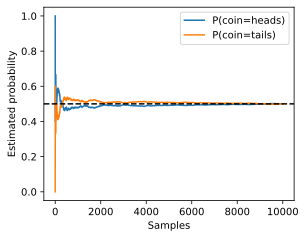

In [12]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [18]:
help(torch.nn)

Help on package torch.nn in torch:

NAME
    torch.nn

PACKAGE CONTENTS
    _reduction
    backends (package)
    common_types
    cpp
    functional
    grad
    init
    intrinsic (package)
    modules (package)
    parallel (package)
    parameter
    qat (package)
    quantizable (package)
    quantized (package)
    utils (package)

FUNCTIONS
    factory_kwargs(kwargs)
        Given kwargs, returns a canonicalized dict of factory kwargs that can be directly passed
        to factory functions like torch.empty, or errors if unrecognized kwargs are present.
        
        This function makes it simple to write code like this::
        
            class MyModule(nn.Module):
                def __init__(self, **kwargs):
                    factory_kwargs = torch.nn.factory_kwargs(kwargs)
                    self.weight = Parameter(torch.empty(10, **factory_kwargs))
        
        Why should you use this function instead of just passing `kwargs` along directly?
        
        1.